<a href="https://colab.research.google.com/github/ahmedhassan97/regression-using-one-variable/blob/master/project1_linear_regression_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
path = 'data.csv'
data = pd.read_csv(path, header=None, names=['Population',
'Profit'])

data = 
    Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
5      8.3829  11.8860
6      7.4764   4.3483
7      8.5781  12.0000
8      6.4862   6.5987
9      5.0546   3.8166
**************************************
data.describe = 
        Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000
**************************************


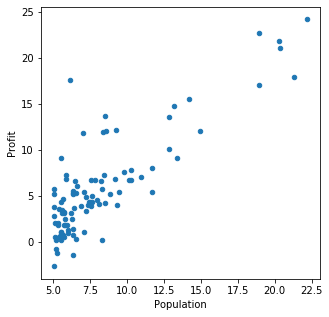

In [27]:
#show data details
print('data = \n' ,data.head(10) )
print('**************************************')
print('data.describe = \n',data.describe())
print('**************************************')
#draw data
data.plot(kind='scatter', x='Population', y='Profit', figsize=(5,5))

In [28]:
# adding a new column called ones before the data
data.insert(0, 'Ones', 1)
print('new data = \n' ,data.head(10) )
print('**************************************')




new data = 
    Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
5     1      8.3829  11.8860
6     1      7.4764   4.3483
7     1      8.5781  12.0000
8     1      6.4862   6.5987
9     1      5.0546   3.8166
**************************************


3


Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

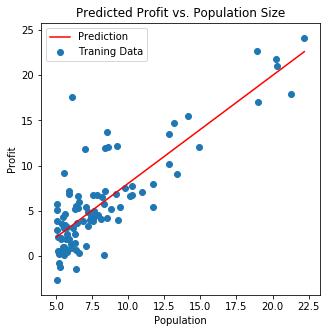

In [106]:
# separate X (training data) from y (target variable)
#print number of column (97*3)
cols = data.shape[1]  
print(cols)
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

#print('new data = \n' ,X.head(10) )
#print('new data = \n' ,y.head(10) )

####################################################################################

# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))
#print('X \n',X)
#print('X.shape = ' , X.shape)
#print('theta \n',theta)
#print('theta.shape = ' , theta.shape)
#print('y \n',y)
#print('y.shape = ' , y.shape)
#print('**************************************')

##################################################################################################
# cost function
def computeCost(X, y, theta):

  z = np.power(((X * theta.T) - y), 2)
  #print('z \n',z)
  #print(z.shape)
  #print('m ' ,len(X))
  return np.sum(z) / (2 * len(X))
 
##print('computeCost(X, y, theta) = ' , computeCost(X, y, theta))
#print('**************************************')

###################################################################################################

# GD function
def gradientDescent(X, y, theta, alpha, iters):
  temp = np.matrix(np.zeros(theta.shape))
  parameters = int(theta.ravel().shape[1])
  #print("temp is ",temp)
  #print("parameters is ",parameters)
  cost = np.zeros(iters)

  for i in range(iters):
    error = (X * theta.T) - y
    for j in range(parameters):
      term = np.multiply(error, X[:,j])
      temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
      theta = temp
    cost[i] = computeCost(X, y, theta)
  return theta, cost
  


  ##################################################################################################

# initialize variables for learning rate and iterations
alpha = 0.01
iters = 10000
# perform gradient descent to "fit" the model parameters

g, cost = gradientDescent(X, y, theta, alpha, iters)
#print('g = ' , g)
#print('cost = ' , cost[0:50] )
#print('computeCost = ' , computeCost(X, y, g))
#print('**************************************')

###########################################################################

# get best fit line
x = np.linspace(data.Population.min(), data.Population.max(),100)
#print('x \n',x)
#print('g \n',g)
f = g[0, 0] + (g[0, 1] * x)
#print('f \n',f)

###################################################################################

# draw the line
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend()
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

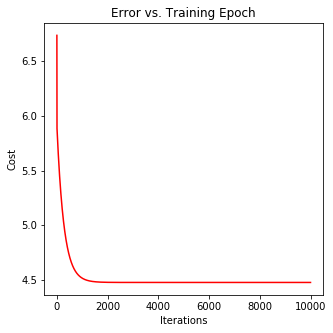

In [107]:
# draw error graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')